In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# Link del dataset: https://www.kaggle.com/datasets/CooperUnion/cardataset
# Dataset sobre carros
df = pd.read_csv("../3 Regresión Multivariada/data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


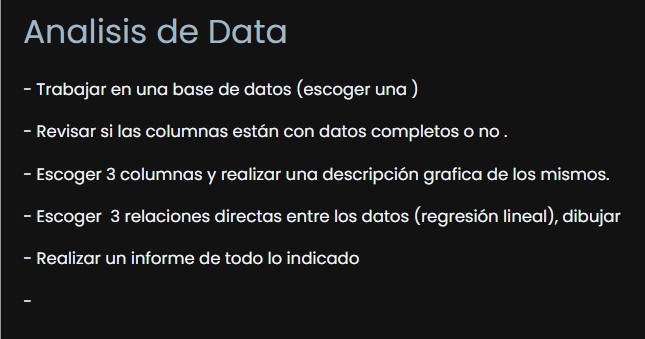

### Revisar si las columnas estan con datos compleos o no

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [91]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Escoger 3 columnas y realizar una descripción grafica de los mismos.

In [92]:
df = df.select_dtypes(include=["number"])
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [93]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_std=True,with_mean=True).fit(df)
scaler_data = scaler.transform(df)
df = pd.DataFrame(scaler_data,columns=df.columns)

In [94]:
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,0.081228,0.784102,0.208466,-1.629557,-0.071930,-0.081587,1.637604,0.092174
1,0.081228,0.463552,0.208466,-1.629557,0.153737,-0.081587,1.637604,0.000919
2,0.081228,0.463552,0.208466,-1.629557,0.153737,0.029680,1.637604,-0.070620
3,0.081228,-0.177549,0.208466,-1.629557,0.153737,-0.192853,1.637604,-0.185416
4,0.081228,-0.177549,0.208466,-1.629557,0.153737,-0.192853,1.637604,-0.101399


In [120]:
columns = ["Engine Cylinders","Engine HP","MSRP"]
df = df.dropna()
df_describe = df[columns]
df_describe.describe(include = "all")

,Engine Cylinders,Engine HP,MSRP
count,11815.000000,11815.000000,11815.000000
mean,0.011617,0.000865,-0.000672
std,0.983683,1.000148,1.002844
min,-3.161403,-1.780300,-0.642105
25%,-0.914823,-0.727063,-0.326166
50%,0.208466,-0.205025,-0.176931
75%,0.208466,0.463552,0.026707
max,5.824915,6.883714,33.695267


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

Engine Cylinders - Engine HP - MSRP - 


Text(0.5, 0.98, 'Diagrama de caja de Engine Cylinders - Engine HP - MSRP - ')

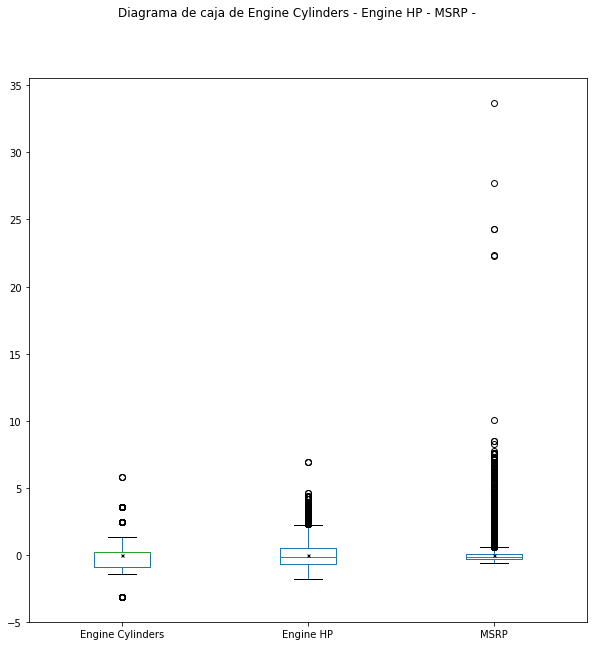

In [98]:
title = ""
for c in columns: 
    title+=c+" - "
print(title)

title="Diagrama de caja de " + axis
ax = df.boxplot(showmeans=True,column=columns, grid=False,figsize=(10,10),meanprops={"marker": "x", 
                       "markeredgecolor": "black", 
                       "markersize": "3"})
ax.get_figure().suptitle(title)

### Escoger 3 relaciones directas entre los datos (regresión lineal), dibujar

In [99]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


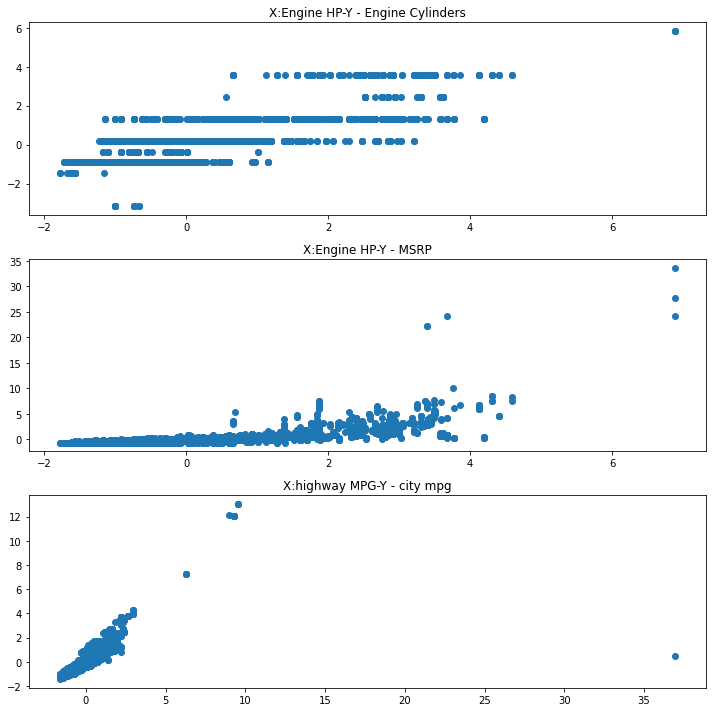

In [121]:
relaciones = [("Engine HP","Engine Cylinders"),("Engine HP","MSRP"),("highway MPG","city mpg")]

columns = ["Engine HP","Engine Cylinders","MSRP","highway MPG","city mpg"]
df_temp = df[columns]

figure, axis = plt.subplots(3)
for i in range(0, 3):
#             axis[i].plot(df_temp[:, i + 1], y_predict, "r-")
    axis[i].scatter(df_temp[relaciones[i][0]],df_temp[relaciones[i][1]])
    axis[i].set_title("X:" + relaciones[i][0] + "-" + "Y - " + relaciones[i][1])
    figure.set_size_inches(10, 10, forward=True)
    figure.tight_layout()
plt.show()

In [122]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
        df_temp, test_size=0.3, random_state=30)


In [137]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def plot_linearRegression(x_label, y_label):
    x_train = df_train[x_label]
    y_train = df_train[y_label]
    x_test = df_test[x_label]
    y_test = df_test[y_label]

    model = LinearRegression(fit_intercept=True, normalize=True)
    
    x_train = x_train.to_numpy()
    y_train = y_train.to_numpy()
    # Entrenamos
    model.fit(x_train.reshape(-1, 1), y_train)
    
    predictions_train = model.predict(x_train.reshape(-1, 1))
    
    plt.scatter(x_train, y_train)
    plt.plot(x_train, predictions_train, "r-")
#      axis[i].set_title("X:" + relaciones[i][0] + "-" + "Y - " + relaciones[i][1])
    plt.show()

       
 

E:\anaconda3\envs\ia_pract_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


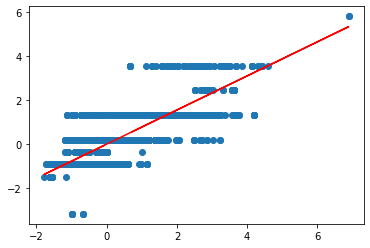

In [138]:
plot_linearRegression(relaciones[0][0],relaciones[0][1])

E:\anaconda3\envs\ia_pract_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


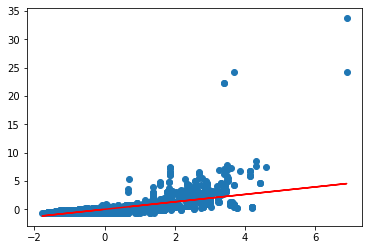

In [139]:
plot_linearRegression(relaciones[1][0],relaciones[1][1])

E:\anaconda3\envs\ia_pract_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


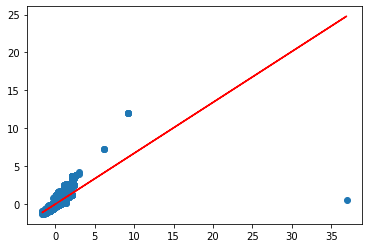

In [140]:
plot_linearRegression(relaciones[2][0],relaciones[2][1])